## PCA
- Goal: given a mysterious matrix with datapoints $a_1, \cdots, a_n \in R^d$, construct a new dataset $a'_1, \cdots, a'_k \in R^k$ with k < d, which looks like the original dataset
- For numbers $x_1, \cdots, x_n \in R:$
    - mean: $m = \frac{1}{n} \Sigma_{i=1}^{n} x_i$
    - variance: $\sigma^2 = \frac{1}{n} \Sigma_{i=1}^{n} (x_i-m)^2$
- For vectors $a_1, \cdots, a_n \in R^d$:
    - mean: $\mu = \frac{1}{n} \Sigma_{i=1}^{n} a_i \in R^d$
- Covariance matrix $S = \frac{1}{n} \Sigma_{i=1}^{n} (a_i - \mu)(a_i-\mu)^T \in R^{d \times d}$
    - when $\mu = 0:$
        - $S = \frac{1}{n} \Sigma_{i=1}^{n} a_i a_i^T = A^TA \in R^{d \times d}$ 
        - symmetric and positive semidefinte matrix

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plot
import heapq

In [55]:
A = np.loadtxt('mysterious_data.txt')
print(A.shape)

(3000, 1000)


In [174]:
df = pd.DataFrame(A)

## 1. Compute $\mu = \frac{1}{n} \Sigma_{i=1}^{n} a_i$

In [175]:
df1 = df.describe()
df1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.081833,-0.277149,0.069341,0.032049,-0.033065,0.117347,-0.039048,0.114474,0.044872,-0.273285,...,0.199922,-0.081698,-0.305270,-0.253691,-0.156283,0.220097,0.180365,0.013587,-0.150563,-0.055067
std,3.623396,4.509088,3.735008,3.424487,4.203917,3.574587,3.483363,3.618069,3.788335,3.942744,...,3.765084,3.635644,3.893819,3.983983,4.217968,3.666632,3.750295,4.153445,3.756964,3.754656
min,-11.313769,-16.166055,-12.007179,-11.178847,-13.803295,-11.637022,-11.371517,-11.465125,-12.121769,-13.076620,...,-12.712768,-12.215052,-13.770667,-13.976514,-13.798050,-13.305596,-12.454419,-13.902516,-12.612192,-12.459389
25%,-2.365682,-3.473277,-2.563342,-2.280766,-2.997412,-2.264338,-2.397096,-2.313122,-2.551062,-2.970882,...,-2.408313,-2.592606,-2.860098,-2.915069,-3.047389,-2.188809,-2.421133,-2.809797,-2.644983,-2.594263
50%,0.066072,-0.230394,0.047532,-0.049348,-0.107041,0.169055,0.030208,0.104231,0.076880,-0.345980,...,0.250727,-0.075801,-0.334877,-0.258272,-0.134922,0.289483,0.188125,-0.057174,-0.133565,-0.052189
75%,2.552037,2.803711,2.708727,2.447448,2.843110,2.524324,2.222391,2.613596,2.578954,2.402805,...,2.738860,2.395868,2.360812,2.382488,2.688209,2.767932,2.723239,2.859379,2.380350,2.446026
max,15.032590,16.111301,15.714008,12.306674,13.780719,13.419085,11.455913,13.486082,12.982322,12.699667,...,12.152766,12.356390,15.642775,11.661964,15.316484,11.333246,12.320256,14.858969,13.468435,13.491570


- The mean is not 0, so this matrix A is not centered. Get mean for each column to make it centered.

In [58]:
mean_ls = []

for i in range(1000):
    mean_ls.append(df1.iloc[1][i])

## 2.  Construct covariance matrix A'
- Subtract mean from each row to construct a covariance matrix

In [176]:
df2 = df.sub(mean_ls)

In [61]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,...,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,2.842171e-17,4.263256e-17,0.000000,-1.894781e-17,3.789561e-17,7.579123e-17,7.460699e-17,-8.526513e-17,-7.105427e-17,-5.684342e-17,...,-2.368476e-17,6.158037e-17,5.684342e-17,-5.684342e-17,0.000000,-7.105427e-17,4.263256e-17,-4.263256e-17,-5.684342e-17,-6.631732e-17
std,3.623396e+00,4.509088e+00,3.735008,3.424487e+00,4.203917e+00,3.574587e+00,3.483363e+00,3.618069e+00,3.788335e+00,3.942744e+00,...,3.765084e+00,3.635644e+00,3.893819e+00,3.983983e+00,4.217968,3.666632e+00,3.750295e+00,4.153445e+00,3.756964e+00,3.754656e+00
min,-1.139560e+01,-1.588891e+01,-12.076520,-1.121090e+01,-1.377023e+01,-1.175437e+01,-1.133247e+01,-1.157960e+01,-1.216664e+01,-1.280333e+01,...,-1.291269e+01,-1.213335e+01,-1.346540e+01,-1.372282e+01,-13.641767,-1.352569e+01,-1.263478e+01,-1.391610e+01,-1.246163e+01,-1.240432e+01
25%,-2.447515e+00,-3.196127e+00,-2.632683,-2.312815e+00,-2.964347e+00,-2.381685e+00,-2.358048e+00,-2.427596e+00,-2.595934e+00,-2.697597e+00,...,-2.608235e+00,-2.510908e+00,-2.554828e+00,-2.661378e+00,-2.891106,-2.408906e+00,-2.601498e+00,-2.823384e+00,-2.494420e+00,-2.539196e+00
50%,-1.576131e-02,4.675520e-02,-0.021809,-8.139739e-02,-7.397561e-02,5.170728e-02,6.925544e-02,-1.024347e-02,3.200828e-02,-7.269439e-02,...,5.080466e-02,5.896970e-03,-2.960704e-02,-4.581488e-03,0.021361,6.938661e-02,7.760243e-03,-7.076089e-02,1.699811e-02,2.878130e-03
75%,2.470204e+00,3.080860e+00,2.639386,2.415399e+00,2.876175e+00,2.406976e+00,2.261438e+00,2.499122e+00,2.534082e+00,2.676091e+00,...,2.538938e+00,2.477566e+00,2.666082e+00,2.636179e+00,2.844492,2.547835e+00,2.542874e+00,2.845792e+00,2.530912e+00,2.501093e+00
max,1.495076e+01,1.638845e+01,15.644667,1.227462e+01,1.381378e+01,1.330174e+01,1.149496e+01,1.337161e+01,1.293745e+01,1.297295e+01,...,1.195284e+01,1.243809e+01,1.594805e+01,1.191565e+01,15.472767,1.111315e+01,1.213989e+01,1.484538e+01,1.361900e+01,1.354664e+01


- From above dataframe, we can see the mean is now all 0 and thus the matrix df2 is centered and we define it as a covariance matrix A'.

## 3. Construct $S = (A')^T A'$ 

In [73]:
df_s = pd.DataFrame(np.cov(df2.T))

In [75]:
df_s.shape

(1000, 1000)

## 4. Compute "eigenthings" of S
- w = eigenvalues of S
- v = eigenvectors of S associated with w

In [177]:
w, v = np.linalg.eigh(df_s)

In [77]:
w.shape, v.shape

((1000,), (1000, 1000))

In [104]:
df_w = pd.DataFrame(w, columns=["eigenvalues"])
df_w = df_w.T
df_w

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
eigenvalues,-1.164596e-13,-5.522409e-14,-5.387324e-14,-5.254635e-14,-4.976673e-14,-4.889480e-14,-4.805071e-14,-4.795805e-14,-4.581819e-14,-4.575792e-14,...,93.960337,95.482156,95.907901,96.920384,97.652763,97.959284,98.004916,99.514388,414.774916,1490.455358


In [178]:
df_v = pd.DataFrame(v)

In [183]:
#df_eig = dataframe containing eigenvalues and eigenvectors associated with eigenvalues.
df_eig = pd.concat([df_w, df_v], axis=0, sort=False)

## 5. Choose 10 largest eigenvalues

In [78]:
ten_w = heapq.nlargest(10,w)
ten_w

[1490.4553582100955,
 414.77491579693793,
 99.51438804344895,
 98.00491635127527,
 97.95928405888455,
 97.652763275715,
 96.92038390711134,
 95.90790073912031,
 95.48215622069068,
 93.96033711222164]

Text(0.5, 1.0, 'Top 10 Largest Eigenvalues')

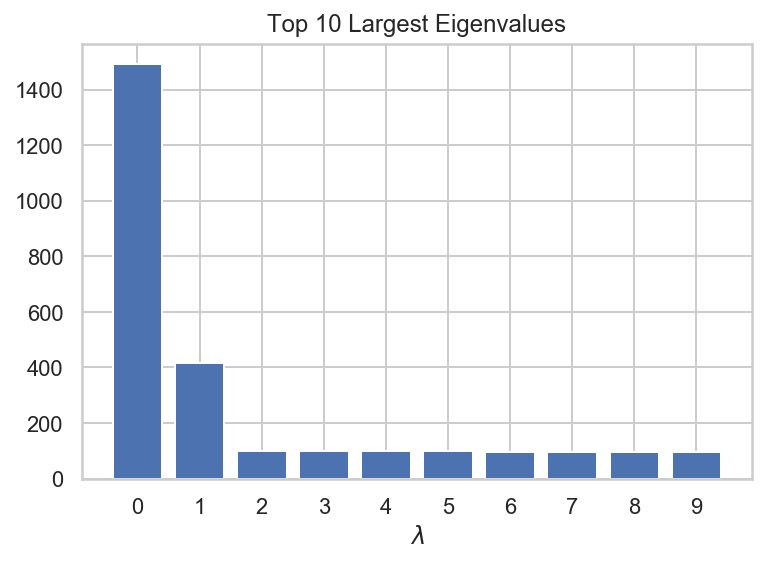

In [186]:
plt.bar(x=np.array(list("0123456789")), height=ten_w)
plt.xlabel("$\lambda$")
plt.title("Top 10 Largest Eigenvalues")

- It looks like the first two largest eigenvalues $\lambda_0, \lambda_1$ capture most of the features.

In [88]:
#get the first two largest eigenvalues
w_result = ten_w[:2]
w_result

[1490.4553582100955, 414.77491579693793]

In [117]:
#find columns that contain eigenvectors associated with two chosen eigenvalues
for w in w_result:
    print(df_eig.columns[df_eig.eq(w).any()])

Int64Index([999], dtype='int64')
Int64Index([998], dtype='int64')


In [181]:
#Get eigenvectors associated with two chosen eigenvalues
df_w_result = df_eig.loc[:, "998": "999"][1:]

## 6. Feature selection with eigenvectors associated with two chosen $\lambda_0 \ and \ \lambda_1 $

In [182]:
df_result = df2.dot(df_w_result)

## 7. PCA Plotting

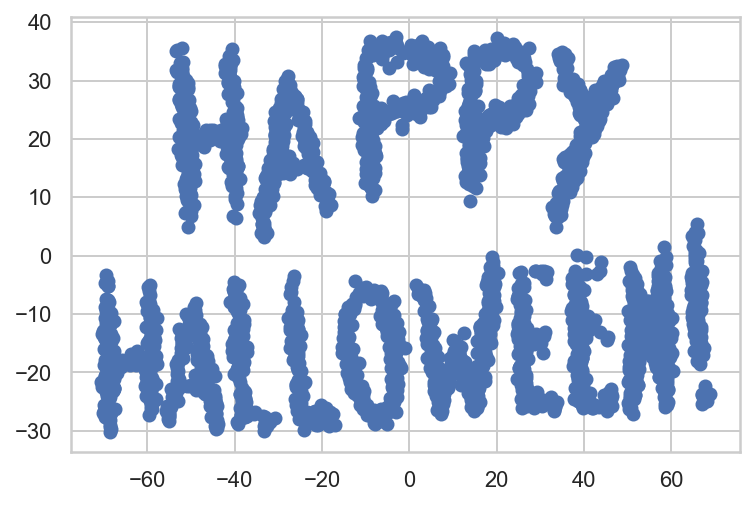

In [172]:
from matplotlib import pyplot, transforms

base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(270)
plt.scatter(df_result[998], df_result[999], transform= rot+base)

pyplot.show()